<a href="https://colab.research.google.com/github/shu-nya/Bike-Sharing-Demand/blob/master/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

##Import the libraries

In [ ]:
# import the required libraries

import pandas as pd     # provides wide variety tools for data analysis,many inbuilt methods for grouping, combining and filtering data.
import numpy as np      # for some basic mathematical operations
from matplotlib import pyplot as plt # comprehensive library for creating static, animated, and interactive visualizations
import seaborn as sns                # high-level interface for drawing attractive and informative statistical graphics

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

##Import the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the dataset

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Project datasets/SeoulBikeData.csv', encoding='unicode_escape')

##Understand the data

In [ ]:
# first 5 rows in the dataset

data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# number of rows and columns in the dataset

data.shape

(8760, 14)

In [ ]:
# the features in the dataset

data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

###Observations:

1. The dataset contains 8760 rows and 14 columns. 

2. Each row of the dataset contains information about weather conditions and the date, time and count of the rented bikes.

In [ ]:
# statistical description of the features

data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


###Observations:

1. The ranges of values in the numerical columns seem to be reasonable. Hence, much data cleaning may not be required. 

2. The data in the columns "Wind speed","Dew point temperature(°C)", "Solar Radiation", "Rainfall" and "Snowfall" seems to be significantly skewed. This is because the median (50 percentile) is much lower than the maximum value.

In [ ]:
# basic information about rows and features

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

###Observations:

1. Date is object datatype. It has to be converted to datetime.

2. Separate Day, Month and Year.

3. Create encoding for the Weekday.

In [ ]:
# converting the datatype of feature Date from object to datetime

data.Date = pd.to_datetime(data.Date)

In [ ]:
# extracting the day

data['Day'] = data['Date'].dt.day

In [ ]:
# extracting the month

data['Month'] = data.Date.dt.month

In [ ]:
# extracting the year

data['Year'] = data['Date'].dt.year

In [ ]:
# extracting the weekdays

data['Weekday'] = data.Date.dt.day_name()

In [ ]:
# creating label encoding for weekdays

map_Weekday = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
data['Weekday_Encoding'] = data.Weekday.map(map_Weekday)

###Observations:

1. Drop the Date column as all the necessary information has been extracted.

In [ ]:
# dropping the Date feature

data.drop(columns = 'Date', inplace = True)

In [ ]:
# dropping the weekday feature since its label encoding has been done

data.drop(columns = 'Weekday', inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Day                        8760 non-null   int64

In [ ]:
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday_Encoding
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,4
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,4
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,4
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,4
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,4


##Data Cleaning

###Check for Missing values

In [ ]:
# Checking the null values in the features

data.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Day                          0
Month                        0
Year                         0
Weekday_Encoding             0
dtype: int64

###Observations:

1. There are no missing values.

###Check for Duplicate Entries.

In [ ]:
# checking the duplicate rows

len(data[data.duplicated()])

0

###Observations:

1. There are no duplicate entries.

###Separate the Numerical and Categorical Features.

###Numerical Features.

1. If the datatype of a feature is not object, then the feature is numerical.

In [ ]:
# extracting the numerical features

num_features= [col for col in data.columns if data[col].dtype != 'object']
num_features

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'Month',
 'Year',
 'Weekday_Encoding']

###Plot the numerical features to analyse the data distribution.

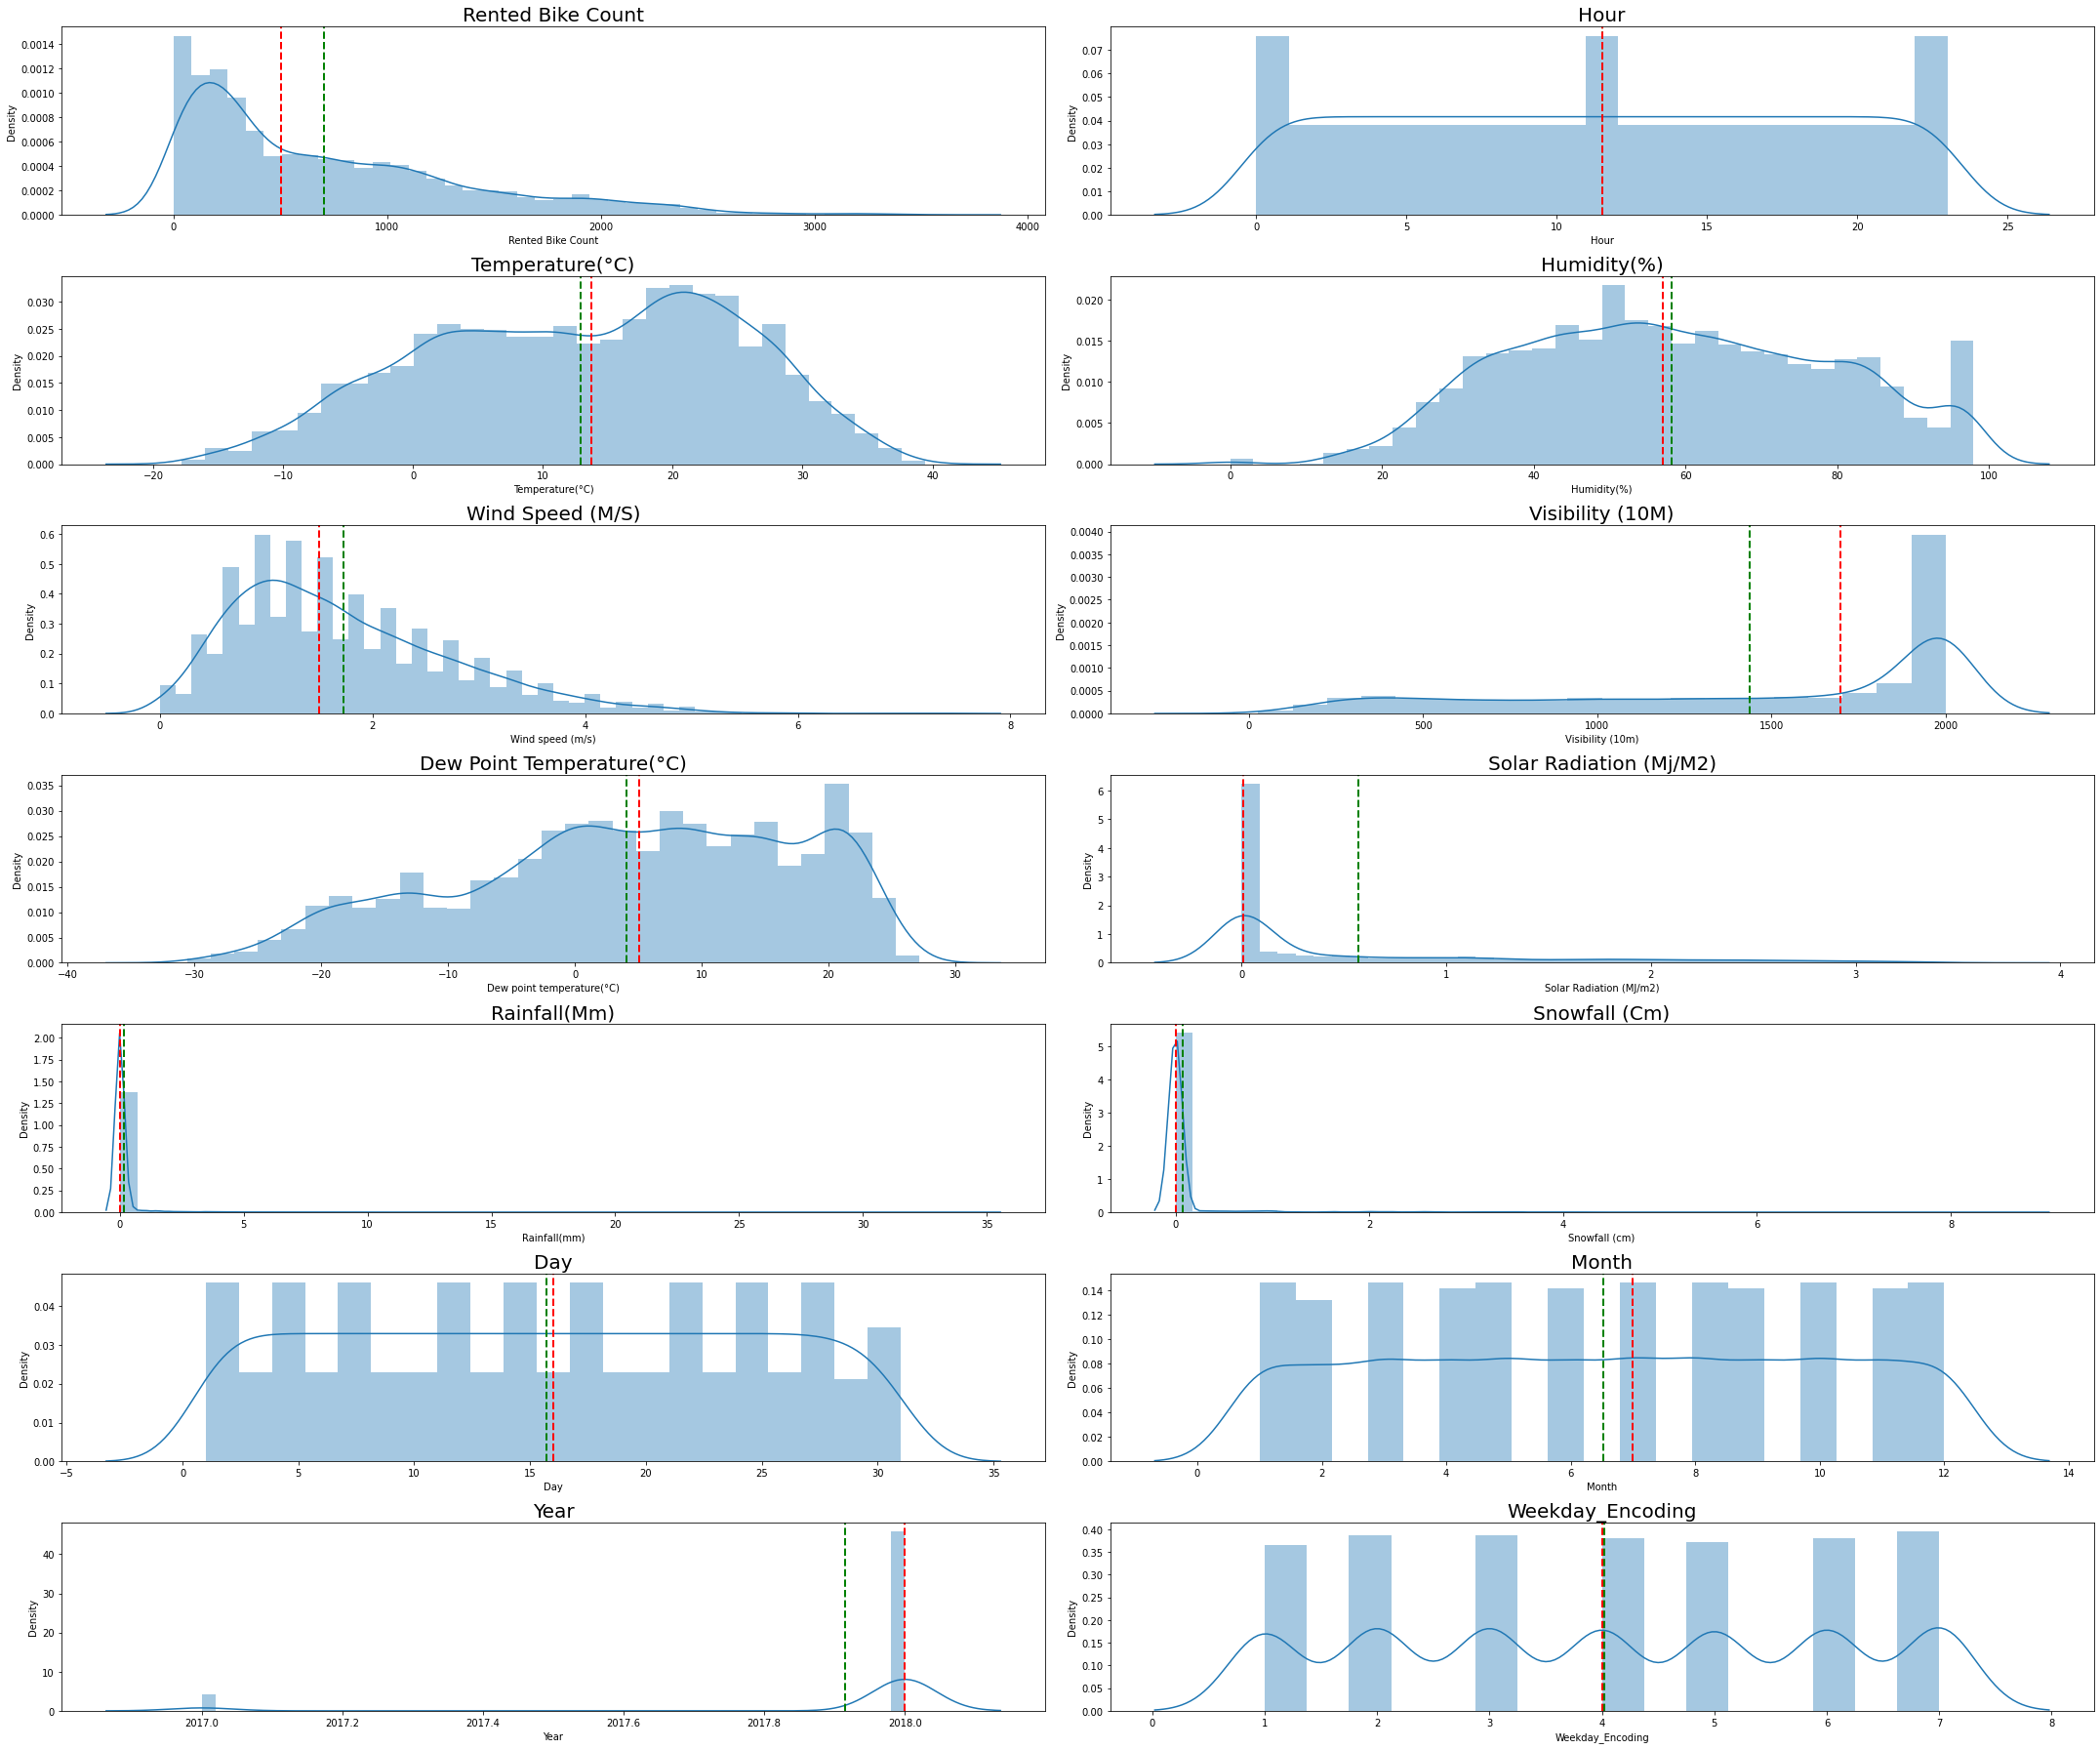

In [ ]:
# plotting the distributions of all the numerical features

fig = plt.figure(figsize = (30,25))
for index,column in enumerate(num_features):
  plt.subplot(7,2,index+1)
  sns.distplot(data[column])
  feature = data[column]
  ax = fig.gca()
  ax.axvline(feature.mean(), color='Green', linestyle='dashed', linewidth=2) # Green color to indicate the mean of data
  ax.axvline(feature.median(), color='Red', linestyle='dashed', linewidth=2) # Red color to indicate the median of data
  plt.title(f'{column.title()}', size=20)
  plt.tight_layout()

In [ ]:
# skew and kurtosis of the features

data.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Rented Bike Count,1.153428,0.853387
Hour,0.000000,-1.204176
Temperature(°C),-0.198326,-0.837786
Humidity(%),0.059579,-0.803559
Wind speed (m/s),0.890955,0.727179
Visibility (10m),-0.701786,-0.961980
Dew point temperature(°C),-0.367298,-0.755430
Solar Radiation (MJ/m2),1.504040,1.126433
Rainfall(mm),14.533232,284.991099
Snowfall (cm),8.440801,93.803324


###Observations:

1. Right/Positive Skewed Distribution: 

Mode < Median < Mean: 

[Rented Bike Count, Wind Speed(m/s), Solar Radiation(MJ/m2)]

2. No Skew: 

Mean = Median = Mode: 

[Hour, Temperature, Humidity(%), Rainfall(mm), Snowfall(cm)]

3. Left/Negative Skewed Distribution: 

Mean < Median < Mode:

[Visibility(10m)]

###Plot histograms to analyse the discrete features distribution

Discrete Variables Count: 5


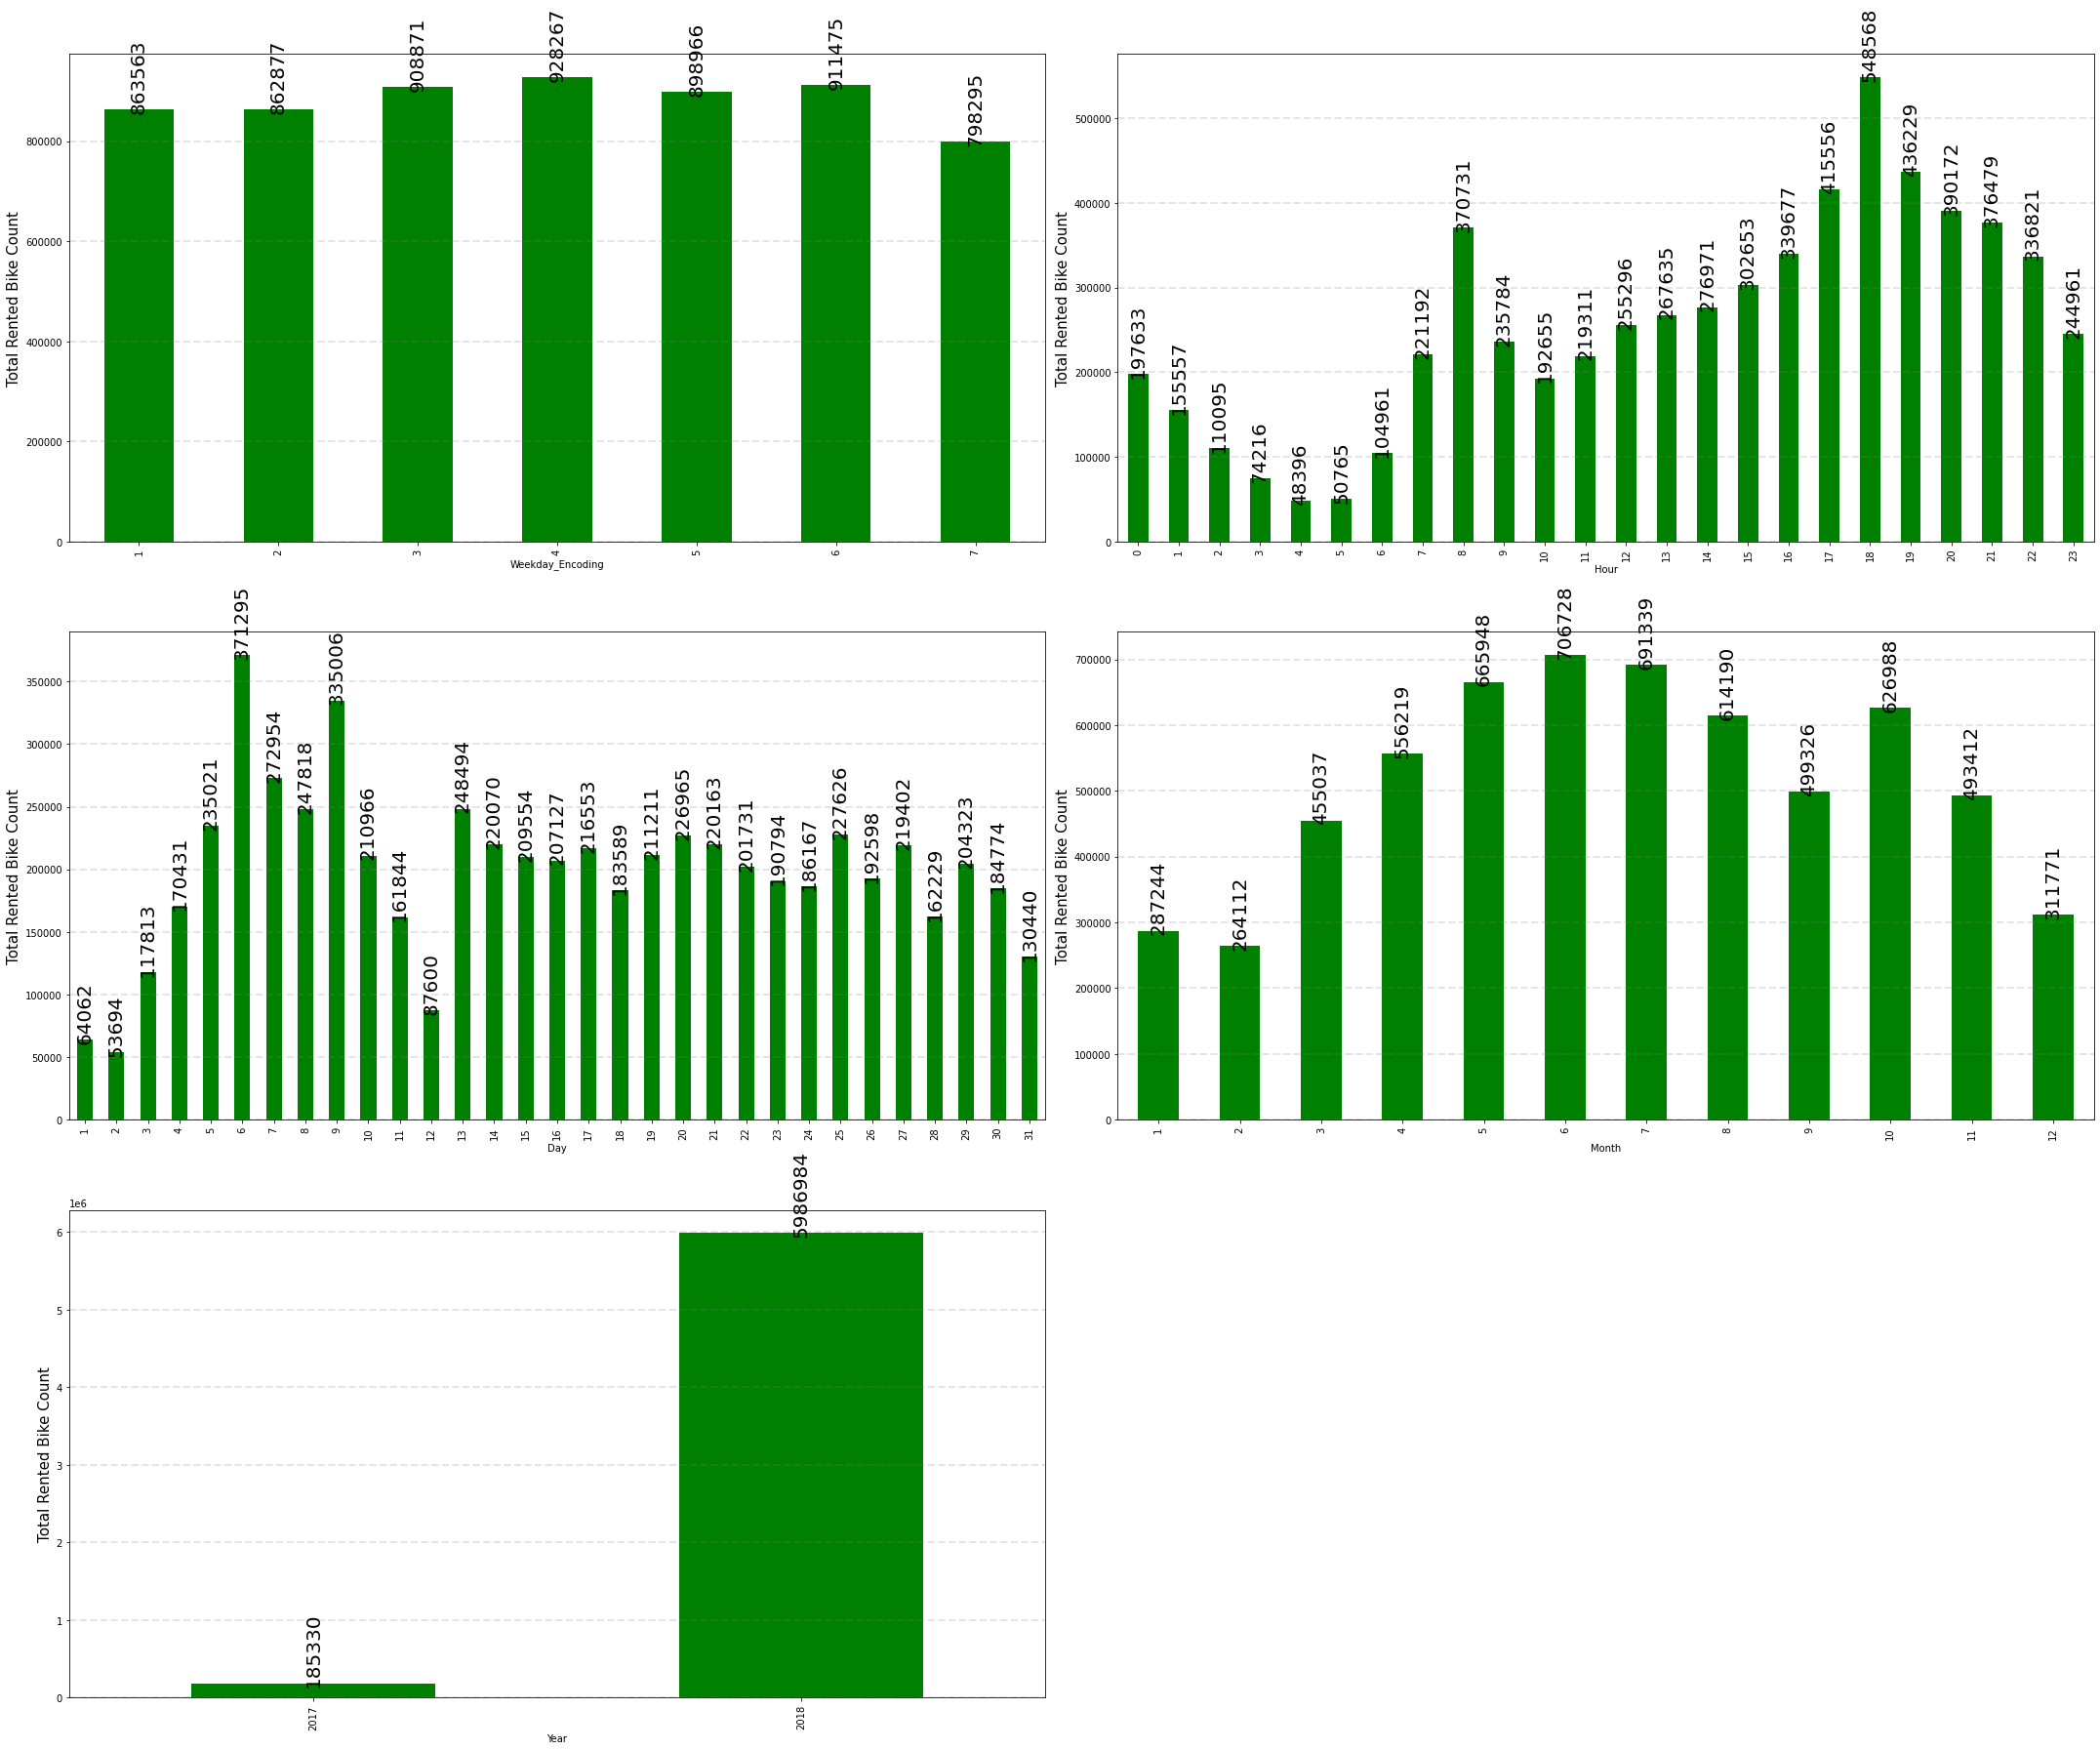

In [ ]:
# plotting histograms for the discrete features

# finding which features are discrete
num_discrete_value=[feature for feature in num_features if len(data[feature].unique())<32]
print("Discrete Variables Count: {}".format(len(num_discrete_value)))

# plotting histograms
fig = plt.figure(figsize = (30,25))
for index,column in enumerate(num_discrete_value) :
  plt.subplot(3,2,index+1)
  dataset=data.copy()
  dataset.groupby(feature)['Rented Bike Count'].sum().plot(kind='bar',color="Green") # kind=bar used for plotting barchart
  feature = data[column]
  ax = fig.gca()
  plt.ylabel('Total Rented Bike Count', size=15)
  plt.tight_layout()
  plt.grid(color='Grey', linestyle='dashed', linewidth=2, axis='y', alpha=0.2)
  for p in ax.patches:
      ax.annotate(round(p.get_height()),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 20, rotation=90)

###Categorical Features

1. The features whose datatype is object are the categorical variables.

In [ ]:
# extracting the categorical features

categ_features=[col for col in data.columns if data[col].dtype == 'object']
categ_features

['Seasons', 'Holiday', 'Functioning Day']

In [ ]:
# for each categorical feature checking the number of categories

for feature in categ_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is Seasons and number of categories are 4
The feature is Holiday and number of categories are 2
The feature is Functioning Day and number of categories are 2


In [ ]:
# grouping by Seasons and checking the total Rented Bike Count

data.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

,Seasons,Rented Bike Count
0,Summer,2283234
1,Autumn,1790002
2,Spring,1611909
3,Winter,487169


In [ ]:
# grouping by Holiday and checking the total Rented Bike Count

data.groupby('Holiday').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

,Holiday,Rented Bike Count
0,No Holiday,5956419
1,Holiday,215895


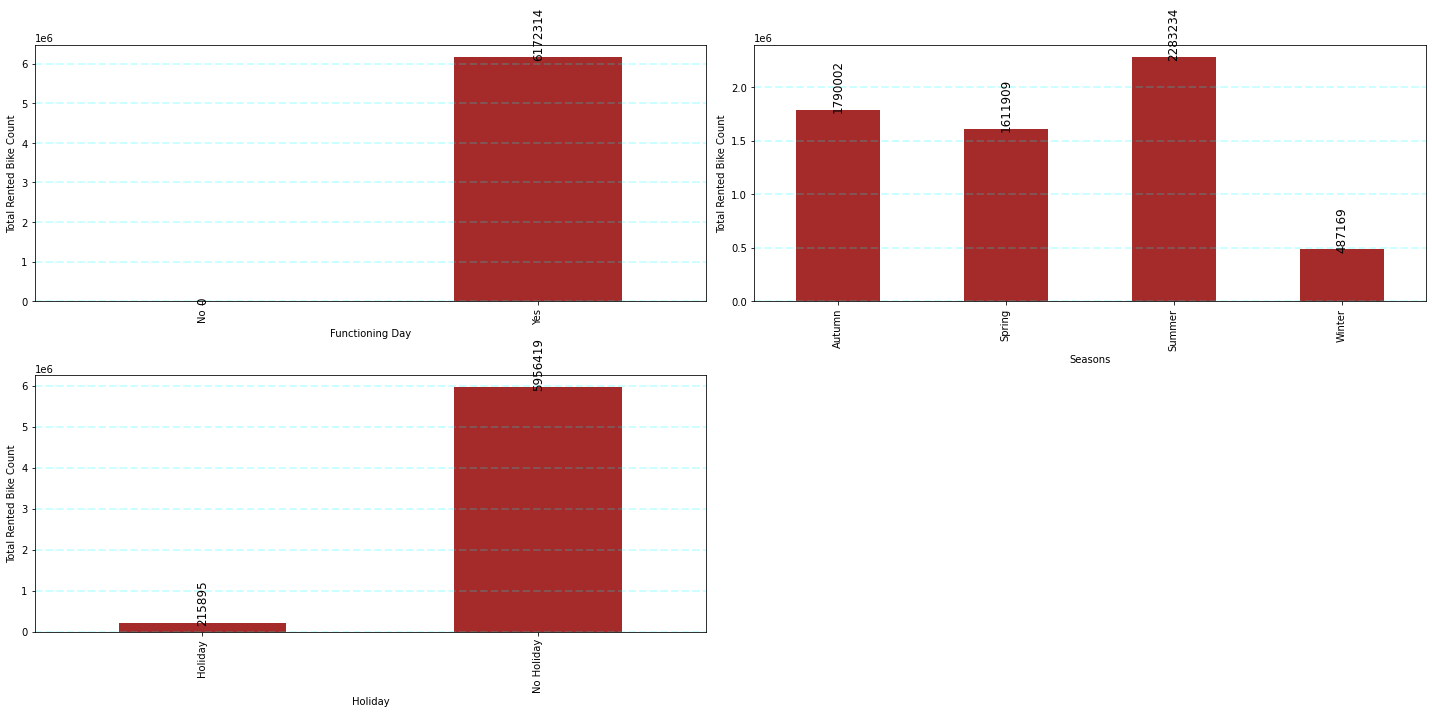

In [ ]:
# find out the relationship between categorical variable and dependent feature Rented Bike Count

fig = plt.figure(figsize = (20,10))
for index,column in enumerate(categ_features) :
    plt.subplot(2,2,index+1)
    dataset=data.copy()
    dataset.groupby(feature)['Rented Bike Count'].sum().plot(kind='bar',color="Brown")
    feature = data[column]
    ax = fig.gca()
    plt.ylabel('Total Rented Bike Count')
    plt.tight_layout()
    plt.grid(color='Cyan', linestyle='--', linewidth=2, axis='y', alpha=0.2)
    for p in ax.patches:
        ax.annotate(round(p.get_height()),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12, rotation=90)

###Observations:

1. Feature Fuctioning day has only 'Yes' category. There are 0 'No'.

2. Hence drop Functioning Day.

In [ ]:
data.drop(columns = 'Functioning Day', inplace = True)

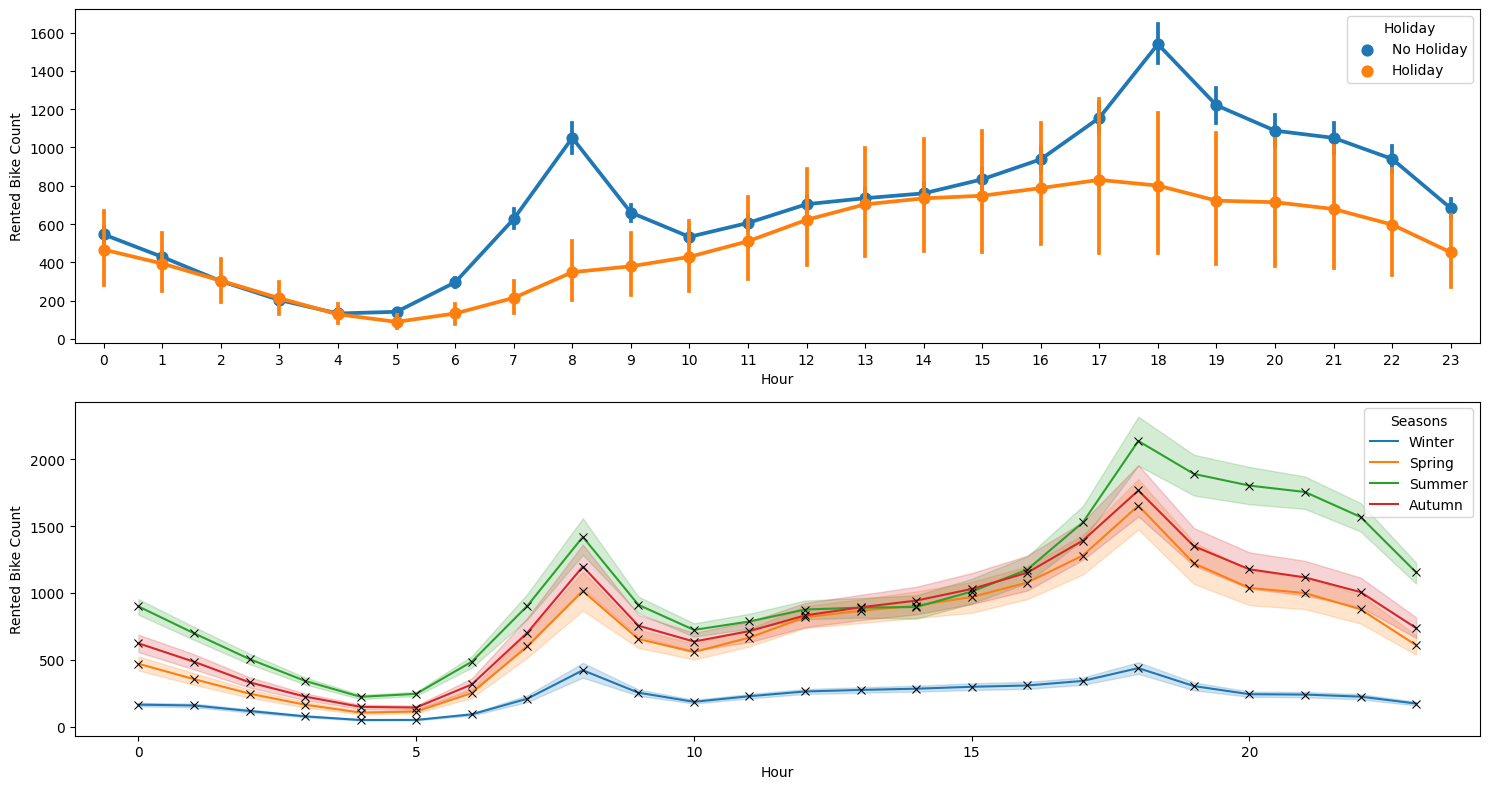

In [ ]:
# plotting the Rented Bike Count vs Hour for Holiday and in different Seasons

fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(15,8), dpi=100)
sns.pointplot(data=dataset, x="Hour", y="Rented Bike Count", ax=axs[0], 
              hue="Holiday")
sns.lineplot(data=dataset, x="Hour", y="Rented Bike Count", ax=axs[1], 
              hue="Seasons", marker="x",markeredgecolor="black")
plt.tight_layout()

##Feature Engineering on the Data

1. Encode categorical data into one-hot vectors.

2. Identify the Inputs and Target.

3. Scale values in numeric columns to a $(0,1)$ range.

4. Split the dataset into training and validation sets.

###Encode the data.

1. oh_data : OneHotEncoder Data

One-hot encoding approach eliminates the order but it causes the number of columns to expand vastly. So for columns with more unique values try using other techniques like LabelEncoding.

2. le_data : LabelEncoder Data


Encode the categorical data and check the accuracy of encoders.

In [ ]:
# check Seasons column Data

data.groupby('Seasons').count()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Day,Month,Year,Weekday_Encoding
Seasons,,,,,,,,,,,,,,,
Autumn,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184
Spring,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
Summer,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
Winter,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160


In [ ]:
# encode labels of multiple columns at ones using LabelEncoder

from sklearn.preprocessing import LabelEncoder

le_data = data.apply(LabelEncoder().fit_transform)
le_data

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day,Month,Year,Weekday_Encoding
0,253,0,111,28,22,1788,114,0,0,0,3,1,11,0,0,3
1,203,1,108,29,8,1788,114,0,0,0,3,1,11,0,0,3
2,172,2,103,30,10,1788,113,0,0,0,3,1,11,0,0,3
3,106,3,101,31,9,1788,114,0,0,0,3,1,11,0,0,3
4,77,4,103,27,23,1788,104,0,0,0,3,1,11,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,991,19,205,25,26,1682,187,0,0,0,0,1,29,10,1,4
8756,755,20,197,28,23,1788,191,0,0,0,0,1,29,10,1,4
8757,686,21,189,30,3,1756,191,0,0,0,0,1,29,10,1,4
8758,704,22,184,32,10,1648,192,0,0,0,0,1,29,10,1,4


In [ ]:
# label encoded Seasons feature

le_data.groupby('Seasons').count()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Day,Month,Year,Weekday_Encoding
Seasons,,,,,,,,,,,,,,,
0,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184
1,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
2,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
3,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160


##Check for Outliers in the Distributions

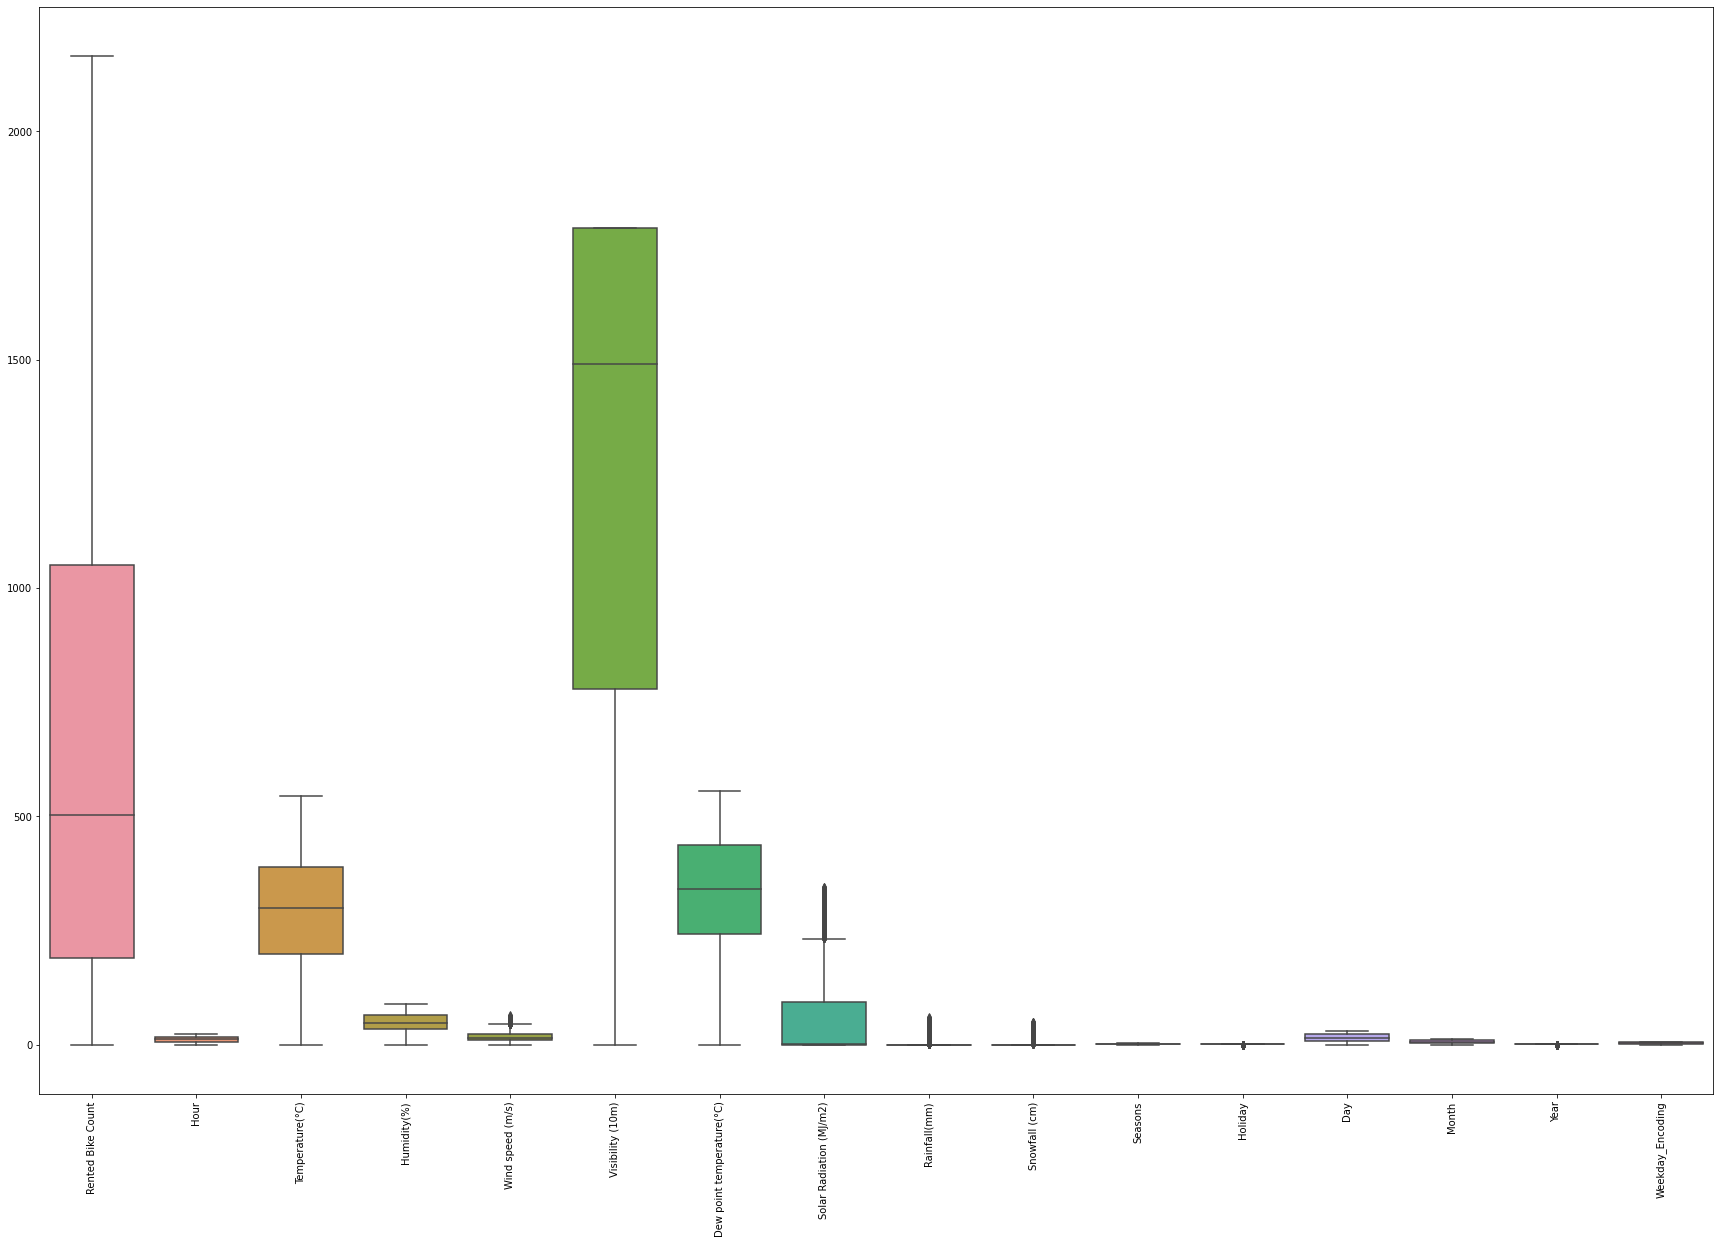

In [ ]:
#checking for outliers

plt.figure(figsize=(30,20))   # for define chart size
plt.xticks(rotation = 90)     # plot X-axis ticks in 90 degree rotation for clear visibility
sns.boxplot(data = le_data)   # box plot of le_df data frame raw data
plt.show()

The Target Parameter is Rented Bike Count.

Analysing its Distribution.

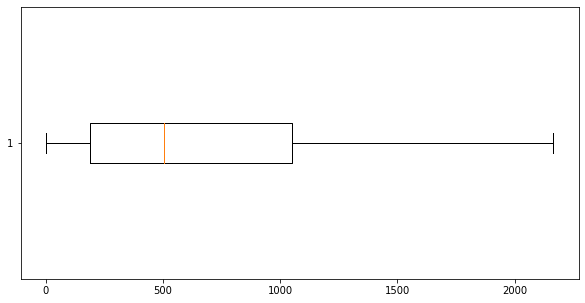

In [ ]:
# plotting the boxplot for Rented Bike Count

plt.figure(figsize=(10,5))
plt.boxplot(le_data['Rented Bike Count'],vert=False)
plt.show()

Outlier detection using Interquartile Range

Square Root The square root method is typically used when your data is moderately skewed. Now using the square root (e.g., sqrt(x)) is a transformation that has a moderate effect on distribution shape. It is generally used to reduce right skewed data. Finally, the square root can be applied on zero values and is most commonly used on counted data.

Square Root Transformation: Transform the values from y to √y.

Log Transformation The logarithmic is a strong transformation that has a major effect on distribution shape. This technique is, as the square root method, oftenly used for reducing right skewness. Worth noting, however, is that it can not be applied to zero or negative values.

Log Transformation: Transform the values from y to log(y).

Cube root transformation involves converting x to x^ (1/3). This is a fairly strong transformation with a substantial effect on distribution shape: but is weaker than the logarithm. It can be applied to negative and zero values too. Negatively skewed data

Cube Root Transformation: Transform the values from y to y^(1/3).

Text(0.5, 1.0, 'cube root')

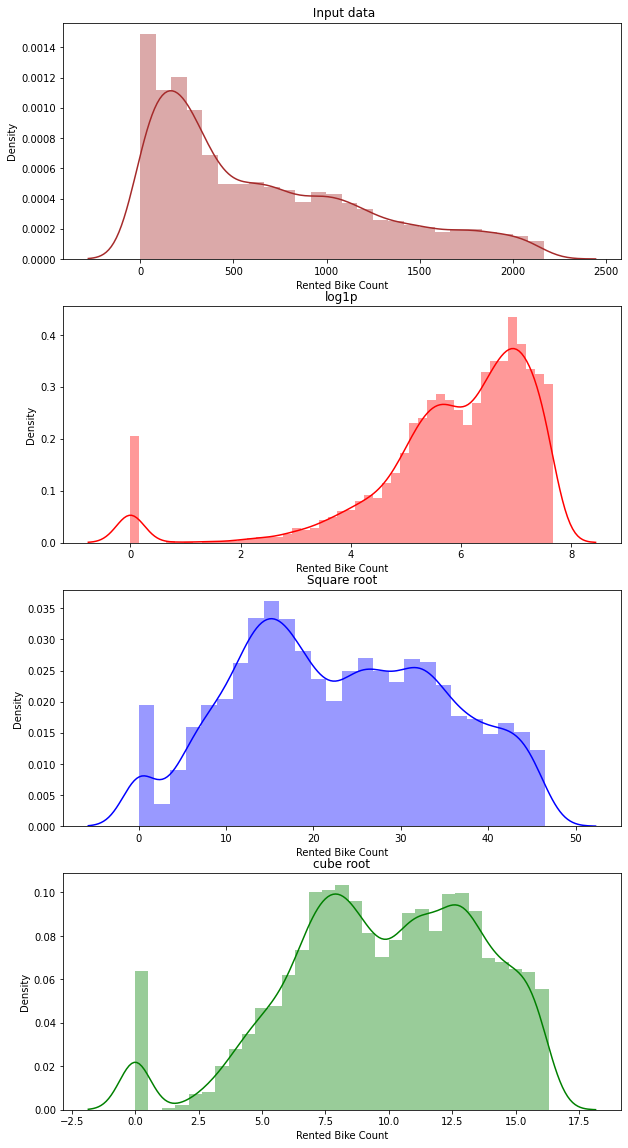

In [ ]:
# apply different tranformation techniques and check data distribution

fig,axes = plt.subplots(4,1,figsize=(10,20))
sns.distplot((le_data['Rented Bike Count']),ax=axes[0],color='brown').set_title(" Input data")

# log transformation and then plotting the distribution
sns.distplot(np.log1p(le_data['Rented Bike Count']+0.0000001),ax=axes[1],color='red').set_title("log1p") # transformation is posible only in positive value so add 0.0000001 in data

# square root transformation and then plotting the distribution
sns.distplot(np.sqrt(le_data['Rented Bike Count']),ax=axes[2], color='blue').set_title("Square root")

# cube root transformation and then plotting the distribution
sns.distplot(np.cbrt(le_data['Rented Bike Count']*2),ax=axes[3], color='green').set_title("cube root")

In [ ]:
import scipy.stats as stats

In [ ]:
# defining a function to plot histogram and QQ plot

def plotvariable(df,variable):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)   # means 1 row, 2 columns and 1st plot

  # histogram
  df[variable].hist(bins=30)

  # QQ plot
  plt.subplot(1,2,2)
  stats.probplot(df[variable], dist='norm',plot=plt)
  plt.show()

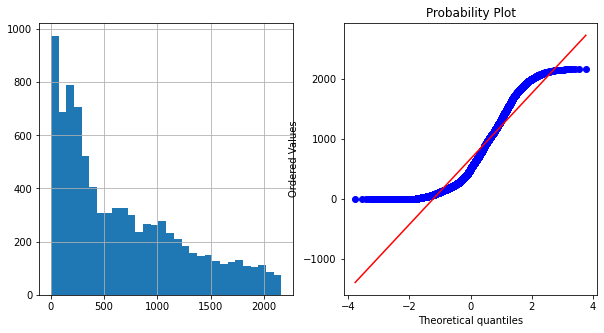

In [ ]:
# calling the function to plot histogram and QQ plot for Rented Bike Count

plotvariable(le_data,'Rented Bike Count')

###Observations:

1. The Rented Bike Count target is not normally distributed.

2. We need to make transformations before applying to the model.

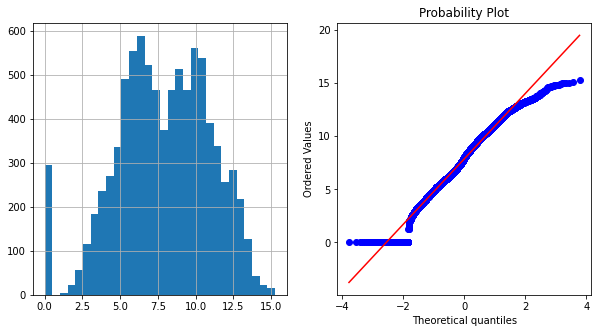

In [ ]:
# applying Cube Root transformation to positive skewed Rented Bike Count

data["RBC_qb"]=np.cbrt(data['Rented Bike Count'])

plotvariable(data,"RBC_qb")

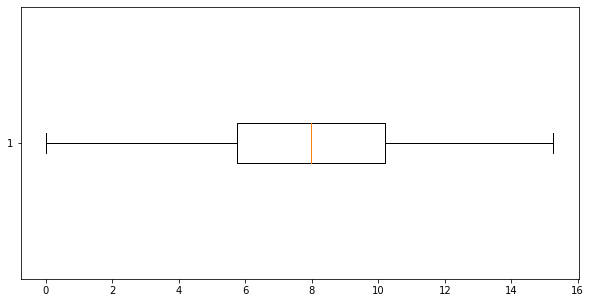

In [ ]:
# checking outliers in Cube Root transformed Rented Bike Count

plt.figure(figsize=(10,5))
plt.boxplot(data["RBC_qb"],vert=False)
plt.show()

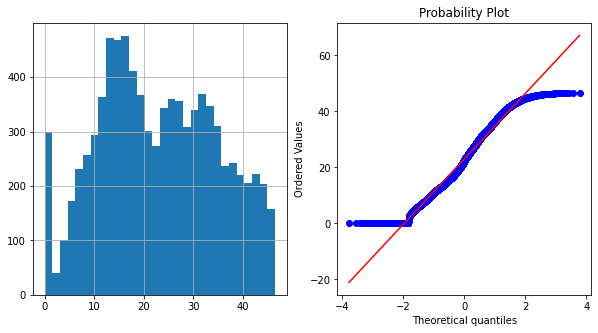

In [ ]:
# applying Square Root transformation to positive skewed Rented Bike Count

le_data['Rented Bike Count']=np.sqrt(le_data['Rented Bike Count'])

plotvariable(le_data,'Rented Bike Count')

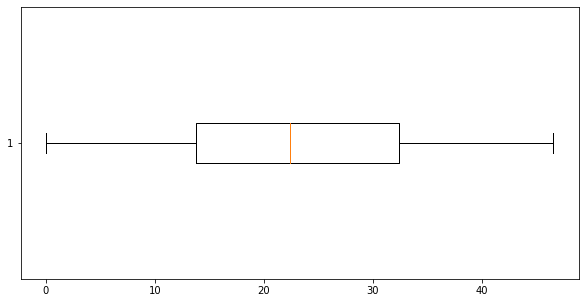

In [ ]:
# checking outliers in Square Root transformed Rented Bike Count

plt.figure(figsize=(10,5))
plt.boxplot(le_data["Rented Bike Count"],vert=False)
plt.show()

###Observations:

1. Now, Rented Bike Count looks like Normal Distributation.

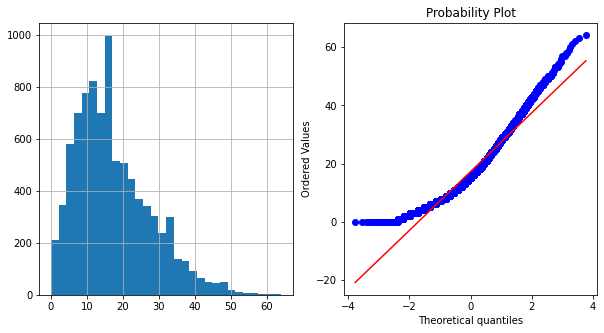

In [ ]:
# calling the function to plot histogram and QQ plot for Wind speed

plotvariable(le_data,'Wind speed (m/s)')

###Observations:

1. The feature Wind Speed is right skewed. 

2. There is a need to apply transformations.


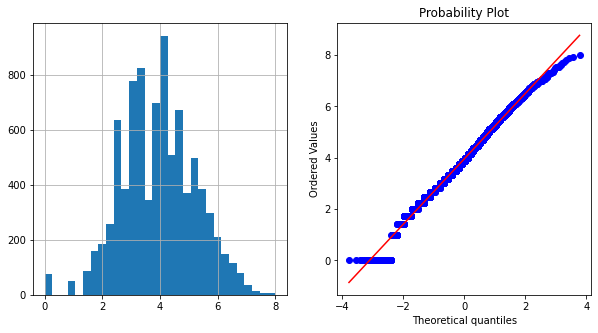

In [ ]:
# applying Square Root transform to positive skewed Wind Speed

le_data['Wind speed (m/s)'] = np.sqrt(le_data['Wind speed (m/s)'])

plotvariable(le_data, 'Wind speed (m/s)')

###Observations:

1. Now, Wind Speed is Normally Distributed.

##Check Correlation Of Data

Correlation is a statistical measure that expresses the strength of the relationship between two variables.

The two main types of correlation : positive and negative.

Positive correlation occurs when two variables move in the same direction; as one increases, so do the other.

Negative correlation occurs when two variables move in opposite directions; as one increases, the other decreases.

Correlation can be used to test hypotheses about cause and effect relationships between variables. Correlation is often used in the real world to predict trends

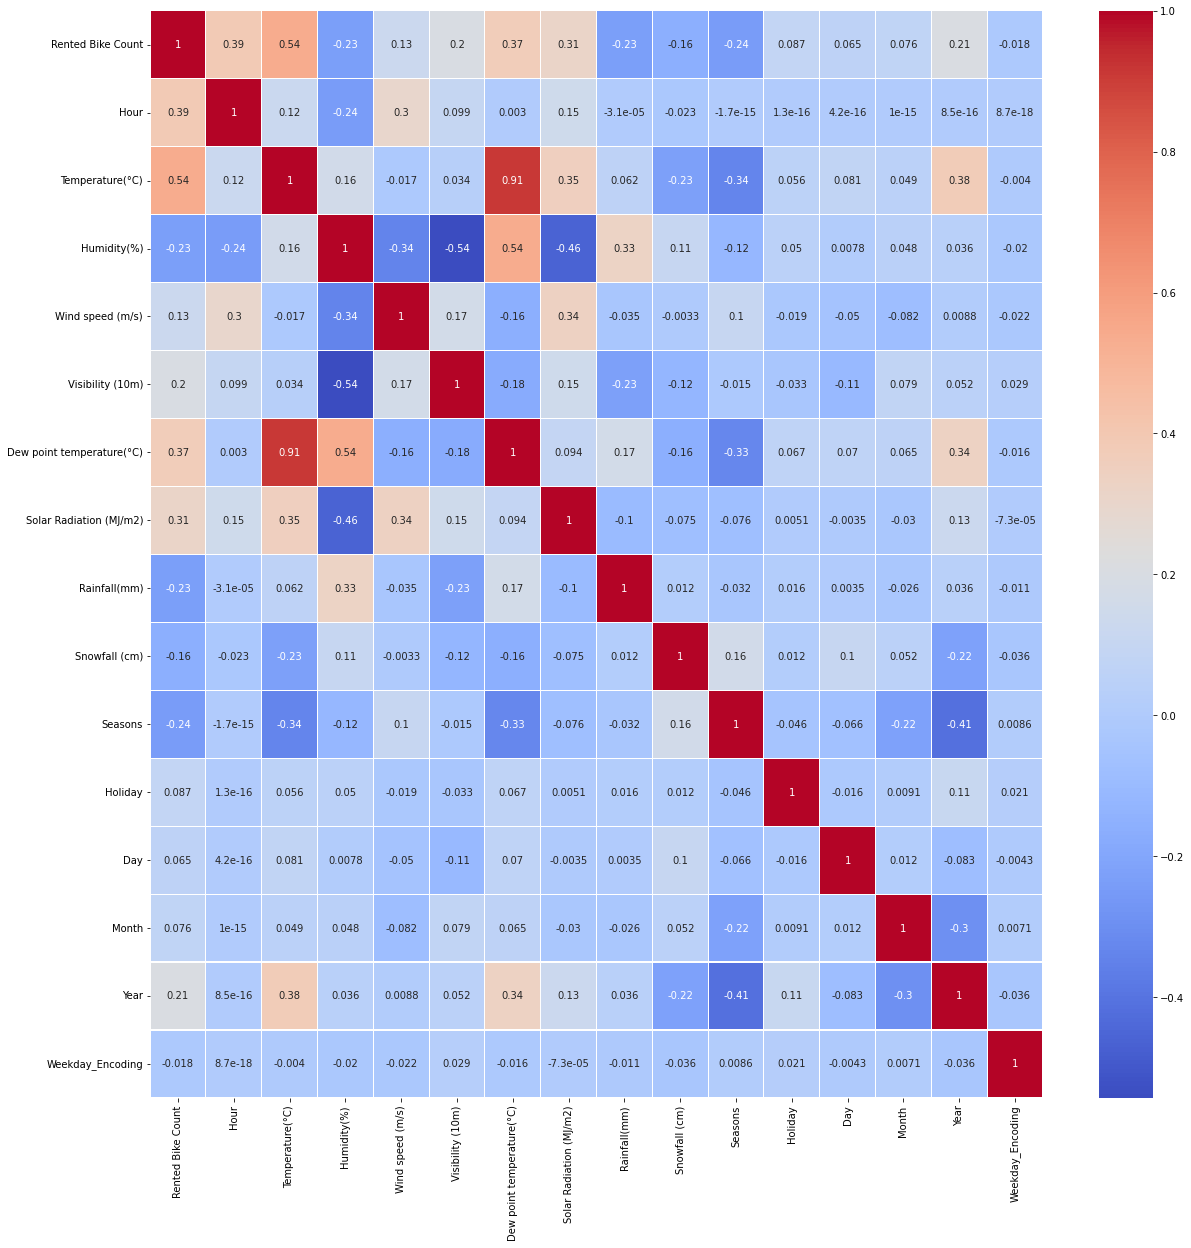

In [ ]:
# checking the correlation among features through heatmap

data_corr= le_data.corr()       
plt.figure(figsize=(20,20))
sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

###Observations:

1. The target variable (Rented Bike Count), the most correlated variables are: Hour, Temperature, Dew point temperature and Functioning Day.

2. The features Temperature and Dew Point Temperature are almost 0.91 correlated.

2. So it can cause the issue of Multicollinearity.

3. Hence, drop the feature Dew Point Temperature.

In [ ]:
# dropping the feature Dew point temperature to prevent multicollinearity

le_data.drop(columns = ['Dew point temperature(°C)'], inplace=True)

##Create the Input and Target variables.

1. The column Rented Bike Count contains the value we need to predict i.e. it's the Target column.

2. Data from all the other columns (except the first and the last column) can be used as inputs to the model.

In [ ]:
# declaring the independent and dependent variables

X = le_data.drop('Rented Bike Count', axis=1)
y = le_data['Rented Bike Count']

##Regression

In [ ]:
# importing the required libraries for regression

from sklearn.model_selection import train_test_split, GridSearchCV,  cross_val_score

from sklearn import preprocessing, linear_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 

from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor

from sklearn.svm import SVR

import xgboost as xgb
from xgboost import plot_importance

from lightgbm import LGBMRegressor

###Check the Accuracy of different Models using MinMaxScaler.

In [ ]:
# defining a function for regression after applying MinMaxScaler

def predict_mm(ml_model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)
    
    mms = MinMaxScaler()

    X_train = mms.fit_transform(X_train)
    X_test = mms.transform(X_test)

    model = ml_model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.scatter(y_pred, y_test, color='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    print(f'R^2: {model.score(X_test,y_test)}')
    print(f'Adj R^2: {1-(1-model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}')
    print(f'RMSE is: {mean_squared_error(y_test, y_pred, squared=False)}')

R^2: 0.49528561090266443
Adj R^2: 0.49121767685121787
RMSE is: 8.461708404849368


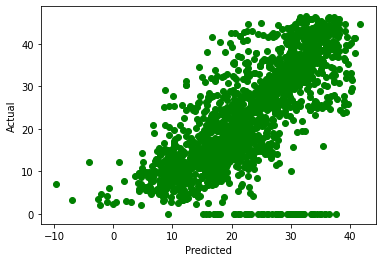

In [ ]:
# linear regression for minmaxscaler

predict_mm(LinearRegression(),X,y)

R^2: 0.7362681918446563
Adj R^2: 0.7341425468739167
RMSE is: 6.116689966521552


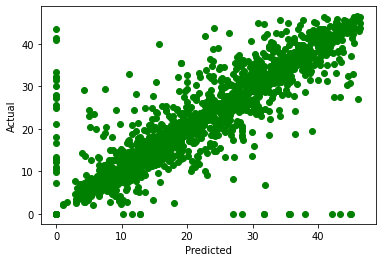

In [ ]:
# decision tree regressor for minmaxscaler

predict_mm(DecisionTreeRegressor(),X,y)

R^2: 0.8448872396880813
Adj R^2: 0.8436370504857975
RMSE is: 4.690930248067214


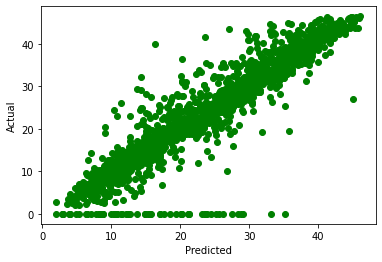

In [ ]:
# random forest regressor for minmaxscaler

predict_mm(RandomForestRegressor(),X,y)

R^2: 0.8974727915050973
Adj R^2: 0.8966464351902276
RMSE is: 3.813772462148216


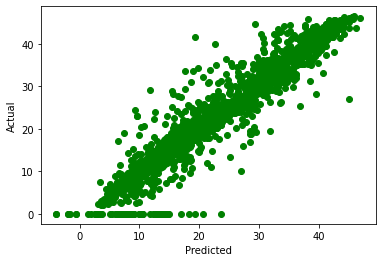

In [ ]:
# light gbm regressor for minmaxscaler

predict_mm(LGBMRegressor(),X,y)

###Check the Accuracy of different Models using Standard Scaler.

In [ ]:
# defining a function for regression after applying Standard Scaler

def predict_ss(ml_model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)
    
    ss = StandardScaler()

    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)

    model = ml_model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.scatter(y_pred, y_test, color='b')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    print(f'R^2: {model.score(X_test,y_test)}')
    print(f'Adj R^2: {1-(1-model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}')
    print(f'RMSE is: {mean_squared_error(y_test, y_pred, squared=False)}')

R^2: 0.49528561090266454
Adj R^2: 0.491217676851218
RMSE is: 8.461708404849366


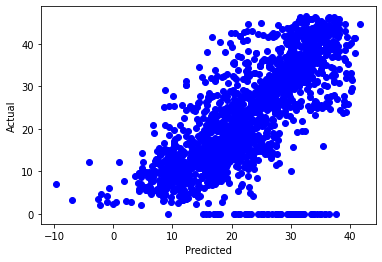

In [ ]:
# linear regression for standard scaler

predict_ss(LinearRegression(),X,y)

R^2: 0.7235810597981625
Adj R^2: 0.7213531581500187
RMSE is: 6.262087198596353


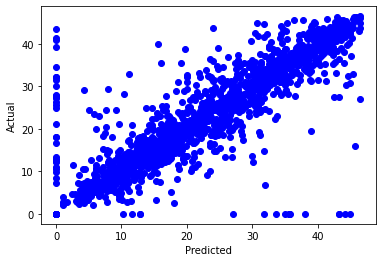

In [ ]:
# decision tree regressor for standard scaler

predict_ss(DecisionTreeRegressor(),X,y)

R^2: 0.8411648833353145
Adj R^2: 0.839884692412283
RMSE is: 4.746882428835177


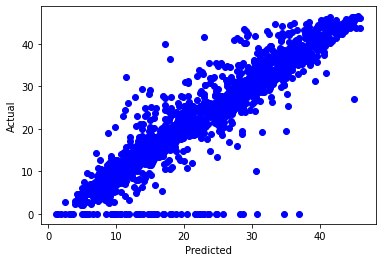

In [ ]:
# random forest regressor for standard scaler

predict_ss(RandomForestRegressor(),X,y)

R^2: 0.8977279104859863
Adj R^2: 0.8969036103977904
RMSE is: 3.8090245919423293


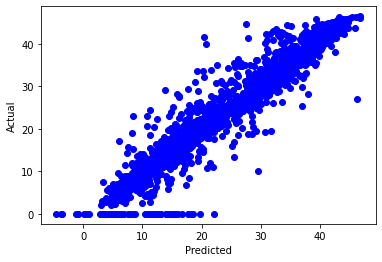

In [ ]:
# light gbm regressor for standard scaler

predict_ss(LGBMRegressor(),X,y)

###Check the Accuracy of different Models using Robust Scaler.

In [ ]:
# defining a function for regression after applying Robust Scaler

def predict_rs(ml_model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)
    
    rs = RobustScaler()

    X_train = rs.fit_transform(X_train)
    X_test = rs.transform(X_test)

    model = ml_model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.scatter(y_pred, y_test, color='brown')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    print(f'R^2: {model.score(X_test,y_test)}')
    print(f'Adj R^2: {1-(1-model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}')
    print(f'RMSE is: {mean_squared_error(y_test, y_pred, squared=False)}')

R^2: 0.49528561090266454
Adj R^2: 0.491217676851218
RMSE is: 8.461708404849366


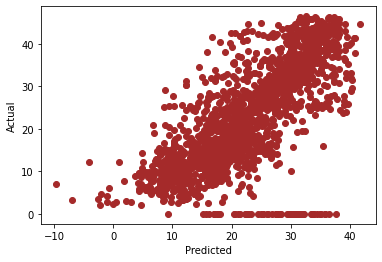

In [ ]:
# linear regression for robust scaler

predict_rs(LinearRegression(), X, y)

R^2: 0.7405290723726196
Adj R^2: 0.7384377695592728
RMSE is: 6.0670778027477565


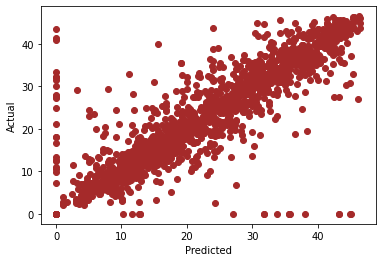

In [ ]:
# decision tree regressor for robust scaler

predict_rs(DecisionTreeRegressor(),X,y)

R^2: 0.8449669681719821
Adj R^2: 0.8437174215711806
RMSE is: 4.689724516095906


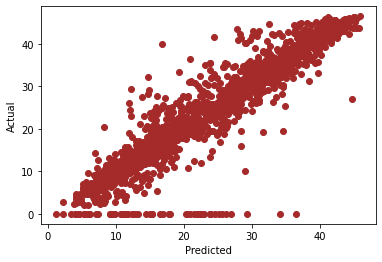

In [ ]:
# random forest regressor for robust scaler

predict_rs(RandomForestRegressor(),X,y)

R^2: 0.8980929702141408
Adj R^2: 0.8972716124611172
RMSE is: 3.8022203671866355


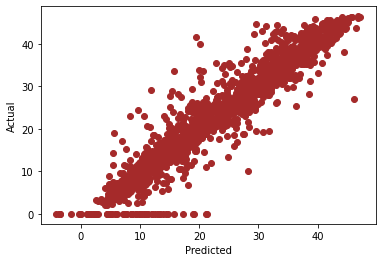

In [ ]:
# light gbm regressor for robust scaler

predict_rs(LGBMRegressor(),X,y)

In [ ]:
# importing the required libraries

from sklearn.neural_network import MLPRegressor
import lightgbm
import time

from sklearn import preprocessing, model_selection, metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
from math import sqrt

###Executing different models

In [ ]:
# declaring the regression models

models = [
           ['LinearRegression: ',              LinearRegression()],
           ['Lasso: ',                         Lasso()],
           ['Ridge: ',                         Ridge()],
           ['KNeighborsRegressor: ',           neighbors.KNeighborsRegressor()],
           ['SVR:' ,                           SVR(kernel='rbf')],
           ['DecisionTree ',                   DecisionTreeRegressor(random_state=42)],
           ['RandomForest ',                   RandomForestRegressor(random_state=42)],
           ['ExtraTreeRegressor :',            ExtraTreesRegressor(random_state=42)],
           ['GradientBoostingRegressor: ',     GradientBoostingRegressor(random_state=42)],
           ['XGBRegressor: ',                  xgb.XGBRegressor(random_state=42)] ,
           ['Light-GBM: ',                     lightgbm.LGBMRegressor(num_leaves=41, n_estimators=200,random_state=42)],
           ['MLPRegressor: ', MLPRegressor(activation='logistic', solver='sgd', learning_rate='adaptive', max_iter=1000, learning_rate_init=0.01, alpha=0.01)]
]

In [ ]:
# splitting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7008, 14) (1752, 14) (7008,) (1752,)


In [ ]:
X_train.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day,Month,Year,Weekday_Encoding
1036,4,99,37,2.828427,1781,0,0,0,3,1,12,0,1,5
302,14,116,18,5.385165,1671,112,0,0,3,1,12,11,0,2
6773,5,326,57,2.236068,1788,0,0,0,0,1,8,8,1,6
6354,18,517,31,3.162278,1788,34,0,0,2,1,21,7,1,2
5784,0,455,41,3.316625,1788,0,0,0,2,1,29,6,1,0


In [ ]:
# run the regression models 

model_data = []
for name,curr_model in models:
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    
    curr_model_data["Train_Time"] = end - start

    pred_train = curr_model.predict(X_train)
    pred_test = curr_model.predict(X_test)
    
    curr_model_data["Train_R2_Score"] = metrics.r2_score(y_train, pred_train)
    curr_model_data["Test_R2_Score"] = metrics.r2_score(y_test, pred_test)
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_test, pred_test))
    
    model_data.append(curr_model_data)

[13:30:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
model_data

[{'Name': 'LinearRegression: ',
  'Train_Time': 0.013179779052734375,
  'Train_R2_Score': 0.5142854587052008,
  'Test_R2_Score': 0.4952856109026643,
  'Test_RMSE_Score': 8.461708404849368},
 {'Name': 'Lasso: ',
  'Train_Time': 0.00878286361694336,
  'Train_R2_Score': 0.5016344901349133,
  'Test_R2_Score': 0.48711007669575046,
  'Test_RMSE_Score': 8.529965906606103},
 {'Name': 'Ridge: ',
  'Train_Time': 0.0047931671142578125,
  'Train_R2_Score': 0.5142854104898125,
  'Test_R2_Score': 0.4952883532262504,
  'Test_RMSE_Score': 8.4616854168243},
 {'Name': 'KNeighborsRegressor: ',
  'Train_Time': 0.018564462661743164,
  'Train_R2_Score': 0.6625212921246358,
  'Test_R2_Score': 0.4829691689893557,
  'Test_RMSE_Score': 8.564330779173217},
 {'Name': 'SVR:',
  'Train_Time': 3.371474266052246,
  'Train_R2_Score': 0.36870440524676273,
  'Test_R2_Score': 0.3545639715561829,
  'Test_RMSE_Score': 9.568895552243784},
 {'Name': 'DecisionTree ',
  'Train_Time': 0.05114889144897461,
  'Train_R2_Score': 1.

###Compare Models Accuracy

In [ ]:
# creating a dataframe of the model_data

df_all_model=pd.DataFrame(model_data)
df_all_model

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,LinearRegression:,0.013180,0.514285,0.495286,8.461708
1,Lasso:,0.008783,0.501634,0.487110,8.529966
2,Ridge:,0.004793,0.514285,0.495288,8.461685
3,KNeighborsRegressor:,0.018564,0.662521,0.482969,8.564331
4,SVR:,3.371474,0.368704,0.354564,9.568896
5,DecisionTree,0.051149,1.000000,0.727344,6.219322
6,RandomForest,3.256018,0.978409,0.846165,4.671567
7,ExtraTreeRegressor :,2.007494,1.000000,0.870876,4.279950
8,GradientBoostingRegressor:,0.925310,0.765638,0.723386,6.264298
9,XGBRegressor:,0.485471,0.764353,0.721936,6.280694


###Observations:

As per above results Train and Test R2 Score is nearby in good model.

Near 1 Score is very good model.

##HyperParameter Tuning

In [ ]:
# declaring the parameters for Gradient Boosting Regressor

gbr = GradientBoostingRegressor()
gbr_params = {
    "n_estimators":[250,500,1000],
    "max_depth":[2,4,6],
    "learning_rate":[0.01,0.1,1],
    "loss": ['ls','huber','quantile'],
}

NameError: ignored

In [ ]:
# model optimization for Gradient Boosting Regressor

regressor = GridSearchCV(gbr, gbr_params, verbose=1,cv=3,n_jobs=-1) 
regressor.fit(X_train,y_train)

In [ ]:
# view selected best parameter by model

regressor.best_params_        

In [ ]:
# view selected best estimator by model

regressor.best_estimator_  

In [ ]:
# predictions for the selected best parameter and estimator

predictions = regressor.predict(X_test)

In [ ]:
# errors for the selected best parameter and estimator

print('Root Mean Squared Error is {:.4f} '.format(np.sqrt(mean_squared_error(y_test,
                                                    regressor.predict(X_test)))) )
 

###Apply best selected parameter and checking result

In [ ]:
#
# Standardize the dataset
#
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
#
# Hyperparameters for GradientBoostingRegressor
#
gbr_params = {'n_estimators': 1000,
          'max_depth': 6,
          'min_samples_split': 10,
          'learning_rate': 0.1,
          'loss': 'huber'}
#
# Create an instance of gradient boosting regressor
#
gbr = GradientBoostingRegressor(**gbr_params)
#
# Fit the model
#
gbr.fit(X_train_std, y_train)
#
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % gbr.score(X_test_std, y_test))
#
# Create the mean squared error
#
mse = mean_squared_error(y_test, gbr.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print('Root Mean Squared Error is {:.4f} '.format(np.sqrt(mean_squared_error(y_test,
                                                    regressor.predict(X_test)))) )


 

In [ ]:

plt.scatter(predictions, y_test, color='brown')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]

#
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
#

# step-3: perform grid search
# Create an instance of gradient boosting regressor
#
gbr = GradientBoostingRegressor()
#
# Fit the model
#
gbr.fit(X_train_std, y_train)
rfe = RFE(gbr)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, param_grid = hyper_params, scoring= 'r2', cv = folds,  verbose = 1, return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)   

In [ ]:
model_cv.best_params_ 

In [ ]:
model_cv.best_estimator_ 

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [ ]:
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
#
feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
result = permutation_importance(gbr, X_test_std, y_test, n_repeats=10,
                                random_state=100, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()

In [ ]:
# plot decision tree
from numpy import loadtxt
from xgboost import XGBRegressor
from xgboost import plot_tree

#
# Standardize the dataset
#
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
#
# fit model no training data
model = XGBRegressor()
model.fit(X, y)
# plot single tree
plot_tree(model)
plt.show()